# Bivariat
## Korelasi dan Regresi Linier
### Scatter Plot
Dalam analisis bivariat, plot yang digunakan adalah Scatter Plot di mana untuk menggambarkan hubungan antara dua variabel.
1. Variabel terikat digambarkan di sumbu Y, merupakan variabel yang diperkirakan (dependen)
2. Variabel bebas digambarkan di sumbu X, merupakan variabel yang menaksir variabel terikat (sumbu Y) (independen)

### Koefisien Korelasi (Corrcoef <i> r </i>)
Menggambarkan hubungan antara dua variabel menggunakan skala interval. Interpretasi koefisien korelasi sebagai berikut:
1. Memiliki nilai antara -1 dan 1, di mana positif-negatifnya menunjukkan arah dan kuatnya hubungan kedua variabel.
2. Semakin mendekati nilai minimum (-1) dan maksimum (1), maka semakin kuat kecenderungan hubungan keduanya. Sebaliknya, apabila semakin mendekati 0 maka semakin lemah hubungannya.
3. Koefisien korelasi bernilai 0 berarti tidak ada hubungan antar keduanya.
4. Korelasi positif: Semakin besar nilai X, maka semakin besar pula nilai Y-nya. Sebaliknya korelasi negatif berarti semakin besar nilai X, maka semakin kecil nilai Y.

#### Formula
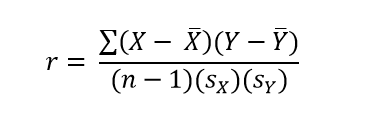
Formula di atas adalah gabungan kalkulasi <b> covariance / (std_X)(std_Y) </b>

#### Case
Menghitung koefisien korelasi:


In [1]:
import pandas as pd
import numpy as np

#informasi - random int generator
np.random.seed(42)
data1 = np.sort(np.random.randint(100, 1000, 30))
data2 = np.sort(np.random.randint(20, 500, 30))
data = pd.DataFrame({'X' : data1, 'Y' : data2})

#preprocess
X_diff = data1 - np.mean(data1)
Y_diff = data2 - np.mean(data2)
s1 = np.std(data1, ddof = 1)
s2 = np.std(data2, ddof = 1)

#kalkulasi
korkoef = np.sum(X_diff * Y_diff) / ((len(data) - 1) * s1 * s2)
print('Koefisien Korelasi sebesar ', korkoef.round(4))

#pakai library
print('Koefisien Korelasi pakai library sebesar ', data['X'].corr(data['Y']))


Koefisien Korelasi sebesar  0.9822
Koefisien Korelasi pakai library sebesar  0.9821713626612218


### Uji Signifikansi Koefisien Korelasi
Uji signifikansi koefisien korelasi dilakukan untuk membuktikan hipotesis tentang koefisien korelasi populasinya.<br>
Hipotesis Nol: rho = 0<br>
Hipotesis Alternatif: rho != 0<br>

Statistik ujinya menggunakan distribusi t derajat kebebasan n - 2 dengan formula:
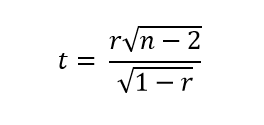

#### Case
Sebagi contoh percobaan, kita memakai data pada case corrcoef dengan taraf signifikansi sebesar 95%.<br>
Hipotesis Nol: rho = 0<br>
Hipotesis Alternatif: rho != 0<br>
alpha = 95%


In [2]:
from scipy import stats

#informasi
alpha = 1 - .05/2

#kalkulasi
t_hitung = (korkoef * (len(data) - 2) ** 0.5) / (np.sqrt(1 - korkoef))
nilai_kritis_atas = stats.t.ppf(alpha, (len(data) - 2))
nilai_kritis_bawah = stats.t.ppf(1 - alpha, (len(data) - 2))
p_value = 2 * (1 - stats.t.cdf(t_hitung, (len(data) - 2)))

#kesimpulan
if (t_hitung >= nilai_kritis_bawah) and (t_hitung <= nilai_kritis_atas):
    print('Nilai t hitung > nilai kritis batas bawah dan < nilai kritis batas atas, maka gagal tolak Hipotesis Nol')
else:
    print('Nilai t hitung < nilai kritis batas bawah dan > nilai kritis batas atas, maka menolak Hipotesis Nol')
print('Nilai t hitung sebesar', t_hitung)
print('Nilai batas atas sebesar', nilai_kritis_atas)
print('Nilai batas bawah sebesar', nilai_kritis_bawah)
print('Nilai p-value sebesar', p_value)
    

Nilai t hitung < nilai kritis batas bawah dan > nilai kritis batas atas, maka menolak Hipotesis Nol
Nilai t hitung sebesar 38.923080766711756
Nilai batas atas sebesar 2.048407141795244
Nilai batas bawah sebesar -2.048407141795244
Nilai p-value sebesar 0.0


### Analisis Regresi
Analisis regresi merupakan teknik untuk menjabarkan persamaan dan menghasilkan perkiraan. Persamaan regresi merupakan persamaan yang mengungkap hubungan linier antara dua variabel.<br>
Metode terbaik dalam menentukan garis regresi adalah menggunakan prinsip kuadrat terkecil atau <b> Least Square Regression</b>, yang merupakan prosedur matematis yang menggunakan data untuk menempatkan garis dengan tujuan meminimumkan penjumlahan kuadrat dari jarak vertikal di antara nilai aktual Y dengan nilai taksiran Y.

#### Bentuk Persamaan
Bentuk persamaan regresi linier adalah:
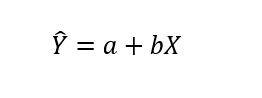
    
    Y ada topinya : Dibaca Yhat, perkiraan nilai Y untuk setiap nilai X yang dipilih
    a : Titik potong Y, yaitu nilai perkiraan Y ketika X = 0. Bisa juga disebut dengan: a merupakan perkiraan nilai Y di mana garis regresi memotong sumbu Y ketika X = 0. (Intercept/konstanta)
    b : kemiringan garis/rata-rata perubahan dalam Y untuk setiap perubahan satu unit(baik naik/turun) variabel bebas X.(koefisien regresi/slope)
    X : nilai variabel bebas apapun yang dipilih.
    Sebenarnya terdapat nilai residual atau error e juga. Untuk jaga-jaga.

Formula kemiringan garis regresi b:
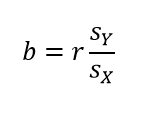
    
Formula titik potong Y (a):
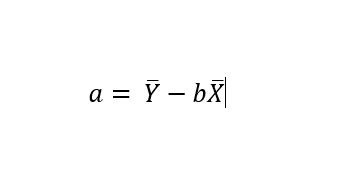

#### Menggambar Regresi
Selanjutnya mencoba menggambar regresi menggunakan data pada case sebelumnya   

     X   Y
0  120  40
1  171  41
2  187  68
3  199  70
4  202  74


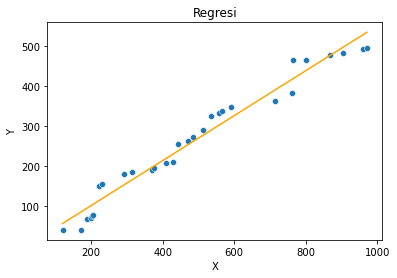

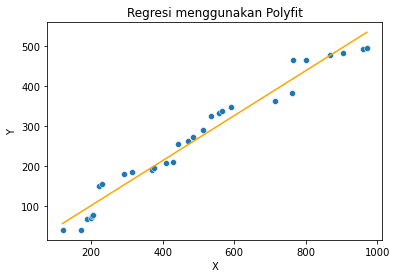

Jumlah residu sebesar 4.405364961712621e-13
Nilai Least Square Value sebesar 22234.97524215295


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

#informasi
print(data.head())

#kalkulasi
slope = data['X'].corr(data['Y']) * np.std(data['Y'], ddof = 1) / np.std(data['X'], ddof = 1)
intercept = np.mean(data['Y']) - slope * np.mean(data['X'])
Yhat = data['X'].apply(lambda x: intercept + slope * x)

#Plotting
sns.scatterplot(x = data['X'], y = data['Y'])
sns.lineplot(x = data['X'], y = Yhat, color = 'orange')
plt.title('Regresi')
plt.show()

#menggunakan np.polyfit
slope, intercept = np.polyfit(data['X'], data['Y'], 1)

sns.scatterplot(x = data['X'], y = data['Y'])
sns.lineplot(x = data['X'], 
             y = intercept + slope * data['X'], color = 'orange')
plt.title('Regresi menggunakan Polyfit')
plt.show()

#hasil
print('Jumlah residu sebesar', np.sum(data['Y'] - Yhat))
print('Nilai Least Square Value sebesar', np.sum((data['Y'] - Yhat) ** 2))

### Signifikansi Kemiringan
Uji hipotesis kemiringan garis populasi adalah 0. Uji ini juga disebut uji koefisien korelasi. Hipotesisnya yakni:<br>
Hipotesis Nol: beta (b) = 0<br>
Hipotesis alternatif: beta (b) != 0

#### Formula
Formula yang digunakan dalam uji ini adalah menghitung t dengan derajat kebebasan n - 2.
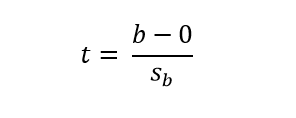
    
    s sub b : kesalahan standar dari perkiraan kemiringan yang telah ditentukan melalui informasi sampel

Mencari s sub b:
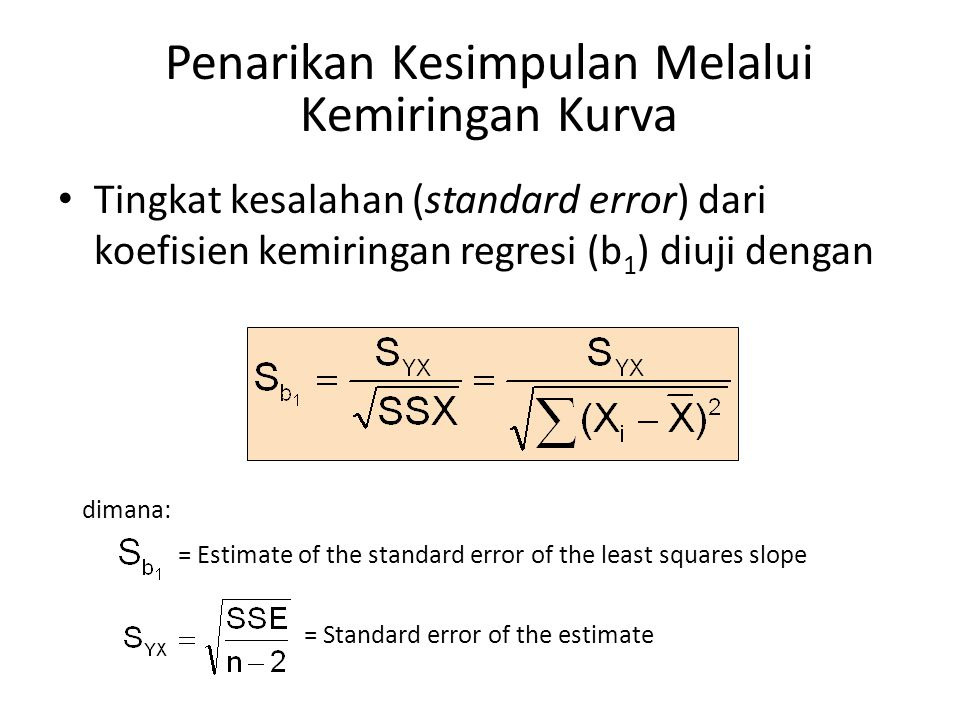


### Kesalahan Standar Estimasi (Root Mean Square Error/RMSE)
Kesalahan standar estimasi mengukur variasi di sekitar garis regresi.
1. Satuannya sama dengan variabel terikat
2. Didasarkan kuadrat deviasi regresinya, dan nilai yang kecil menunjukkan bahwa titik berkumpul di dekat garis regresinya.

#### Formula
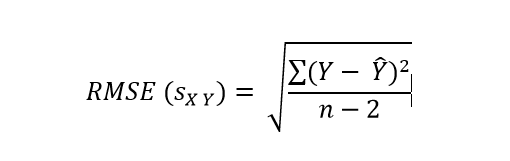

    Untuk penyebut, apabila data berupa sampel, maka degree of freedom adalah n - 2. Sedangkan untuk populasi menggunakan N


### Koefisien Determinasi (R-squared)
Koefisien determinasi merupakan proporsi variasi dari variabel terikat yang dijelaskan oleh variasi bebas.
1. Nilainya berkisar 0 - 1.0
2. Nilainya merupakan kuadrat dari koefisien korelasi r
3. Dalam tabel ANOVA, formula yang membentuknya adalah sebagai berikut:

#### Formula
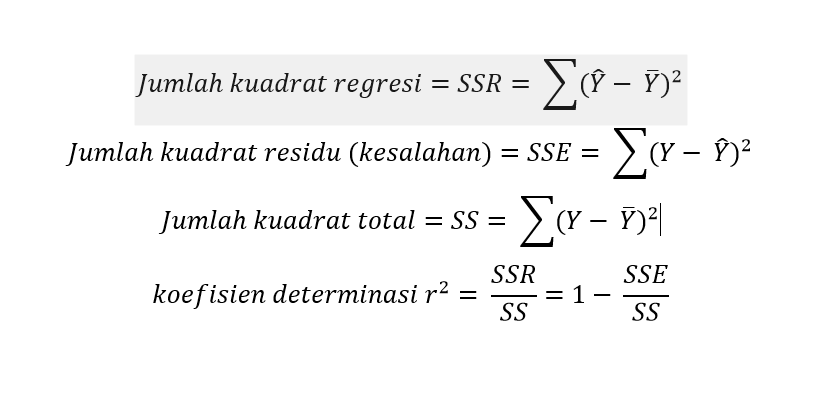

### Asumsi dari kesimpulan mengenari Regresi Linier
1. Untuk setiap nilai X, nilai Y (Yhat, yang di regresinya lho ya) terdistribusi normal di sekitar garis regresi.
2. Standar deviasi dari setiap distribusi normal sama untuk seluruh nilai X dan diperkirakan oleh kesalahan standar estimasi.
3. Deviasi dari garis regresi saling bebas, tanpa adanya pola berupa ukuran atau arah.


### Estimasi Interval
#### Interval Kepercayaan (Confidence Interval)
Dalam interval kepercayaan (Confidence Interval), rata-rata nilai Y diperkirakan untuk setiap nilai X
1. Dihitung menggunakan:
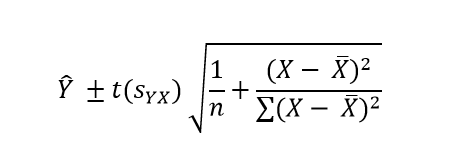
2. Lebar interval dipengaruhi oleh squared error, tingkat kepercayaan, ukuran kesalahan standar estimasi, ukuran sampel, dan nilai variabel bebas.

#### Interval Prediksi (Prediction Interval)
1. Dihitung menggunakan:
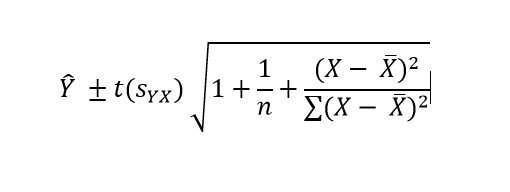
2. Selisih antara interval prediksi dan kepercayaan sebesar 1 dalam akarnya.
3. Interval prediksi bernilai lebih besar daripada interval kepercayaan, yang lebarnya dipengaruhi oleh squared error, tingkat kepercayaan, ukuran kesalahan standar estimasi, ukuran sampel, dan nilai variabel bebas.

### Case
Mengerjakan tiap-tiap bagian di atas menggunakan data sebelumnya.

#### Signifikansi Kemiringan


In [23]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

#preprocess
X = data.X
Y = data.Y

model = OLS(Y, sm.add_constant(X))
result = model.fit()
print(result.summary(), '\n')

#f_test - Uji ANOVA
print(result.f_test(np.identity(2)[1:,:]), '\n')

#t-test - Uji kemiringan/slope
print(result.t_test(np.identity(2)), '\n')

#f-test menggunakan ANOVA
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

formula = 'Y ~ X'
model_anova = ols(formula = formula, data = data).fit()
anova_table = anova_lm(model_anova, typ = 2)
print(model_anova.summary(), '\n')
print('Anova Table')
print(anova_table, '\n\n')

#Linear Regression menggunakan Sklearn
from sklearn.linear_model import LinearRegression
X_sklearn = X.to_numpy().reshape((-1, 1))

regr = LinearRegression().fit(X_sklearn, Y)

Y_pred = regr.predict(X_sklearn)
print('Linreg menggunakan Sklearn')
print('-----------------------------')
print('Nilai Koefisien Determinasi R2 sebesar', regr.score(X_sklearn, Y))
print('Nilai intercept sebesar', regr.intercept_)
print('Nilai slope sebesar', regr.coef_)



                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     764.3
Date:                Thu, 04 Feb 2021   Prob (F-statistic):           7.20e-22
Time:                        20:15:45   Log-Likelihood:                -141.69
No. Observations:                  30   AIC:                             287.4
Df Residuals:                      28   BIC:                             290.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.4357     11.185     -1.022      0.3

## Multivariate Regression
### Persamaan Multivariate Linear Regression
Persamaan regresi linear berganda
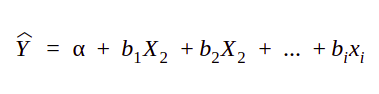

Dengan alpha merupakan titik potong ketika Y ketika seluruh X sama dengan nol, b sub i mengacu